# Clustering

Miguel A. Gutiérrez Naranjo <br>
José Luis Ruiz Reina

Versión del 12 de enero de 2024.

***

Los ejemplos y la discusión que sigue está parcialmente tomado del libro:

[*Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow*](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)  
**Aurélien Géron**  
O'Reilly 2019

Github con el material del libro: [Github](https://github.com/ageron/handson-ml2). 

Cargamos las librerías que vamos a necesitar

In [1]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

En esta práctica vamos a trabajar con algunos algoritmos de clustering. Empezamos con algunos ejemplo para K-medias

# K - medias

### Un primer ejemplo de juguete

Creamos un primer ejemplo con la función make_blobs de scikit-learn. Sólo nos interesan los datos, no la clasificación.

In [3]:
X1, _ = make_blobs(n_samples=150, n_features=2,centers=3, random_state=0,cluster_std=0.3)

Dibujamos los puntos para tener intuición de cómo están distribuidos

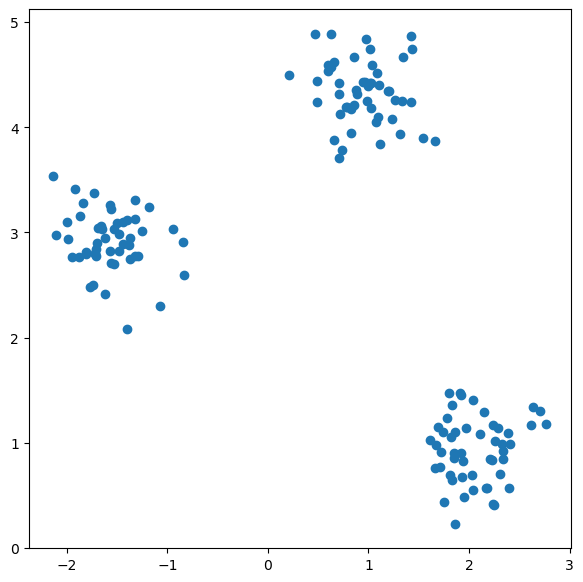

In [4]:
plt.rcParams["figure.figsize"] = (7,7)
plt.scatter(X1[:, 0], X1[:, 1])
plt.show()

Vamos a aplicar k-medias sobre este ejemplo. Creamos los clusters

In [5]:
km_1 = KMeans(n_clusters=3, init='random',n_init=10, random_state=0)

Con este código, estamos fijando el número de clusters a 3. El parámetro n_init=10 indica que vamos a lanzar el algoritmo 10 veces de manera independiente y vamos a elegir la salida con mejor _inercia_. 

Una vez finalizdo el algoritmo, podemos, además, saber qué cluster se asigna a cada punto.

In [6]:
y_km_1 = km_1.fit_predict(X1)
y_km_1[:10]

C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 1, 1, 0, 1, 1, 0, 2, 1])

Ahora que tenemos las predicciones, podemos visualizar los clusters y los centroides. Para ello usamos la función dibuja_clusters.

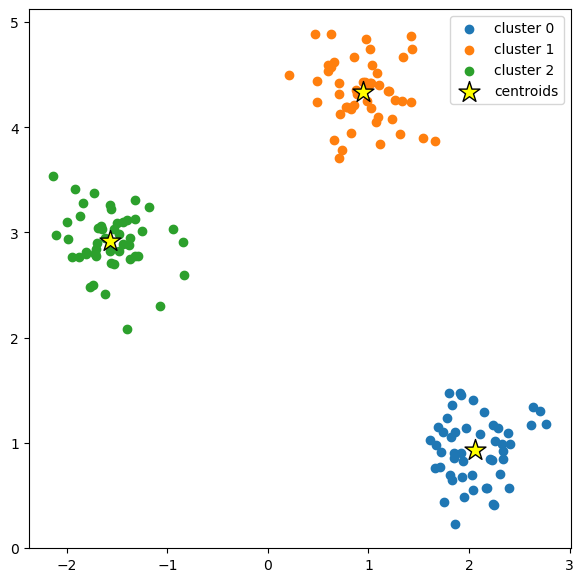

In [7]:
def dibuja_clusters(model,Xs,ys):
    for i in range(max(ys)+1):
        plt.scatter(Xs[ys==i,0], Xs[ys==i,1],label='cluster ' + str(i))
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=250, marker='*',
    c='yellow', edgecolor='black',label='centroids')    
    plt.legend()
    plt.show()
        
dibuja_clusters(km_1,X1,y_km_1)        

Veamos que el espacio se divide en celdas de Voronoi que determinan la clasificación de los nuevos puntos

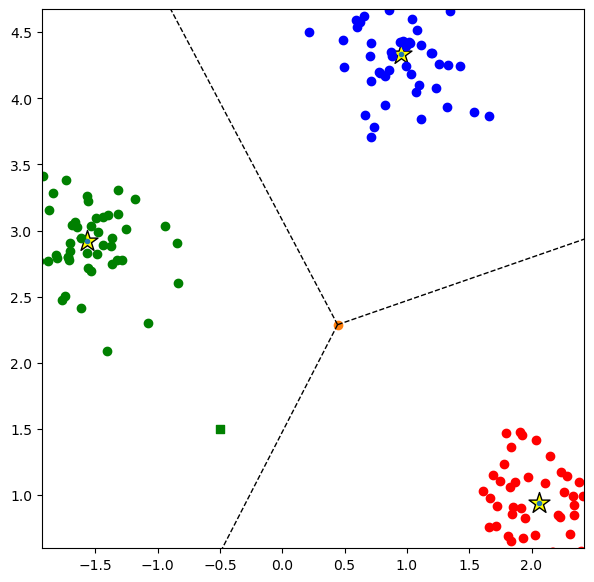

In [8]:
plt.rcParams["figure.figsize"] = (7,7)
points = km_1.cluster_centers_
vor = Voronoi(points)

voronoi_plot_2d(vor)
plt.scatter(km_1.cluster_centers_[:, 0], km_1.cluster_centers_[:, 1], s=250, marker='*',
c='yellow', edgecolor='black')

colors = ['r','b','g']
for i in range(max(y_km_1)+1):
    plt.scatter(X1[y_km_1==i,0], X1[y_km_1==i,1],color = colors[i], label='cluster ' + str(i))

# Elige un punto nuevo. Lo representamos con un cuadrado    
nuevo_punto = (-0.5,1.5)  

y_nuevo_punto = km_1.predict([nuevo_punto])[0]
plt.scatter([nuevo_punto[0]],[nuevo_punto[1]],color = colors[y_nuevo_punto],marker="s")
plt.show()

### Otro ejemplo de laboratorio

En este caso, creamos a mano el siguiente ejemplo

In [9]:
X_lab = np.array([[0.1,0.1],[0.2,0.1],[0.3,0.1],
                  [0.1,0.2],[0.2,0.2],[0.3,0.2],
                  [0.1,0.3],[0.2,0.3],[0.3,0.3],                  
                  [2.1,0.1],[2.2,0.1],[2.3,0.1],
                  [2.1,0.2],[2.2,0.2],[2.3,0.2],
                  [2.1,0.3],[2.2,0.3],[2.3,0.3],
                  [0.1,2.1],[0.2,2.1],[0.3,2.1],
                  [0.1,2.2],[0.2,2.2],[0.3,2.2],
                  [0.1,2.3],[0.2,2.3],[0.3,2.3],
                  [2.1,2.1],[2.2,2.1],[2.3,2.1],
                  [2.1,2.2],[2.2,2.2],[2.3,2.2],
                  [2.1,2.3],[2.2,2.3],[2.3,2.3]])

# y_lab = np.array([0]*9+[1]*9+[2]*9+[3]*9)                              

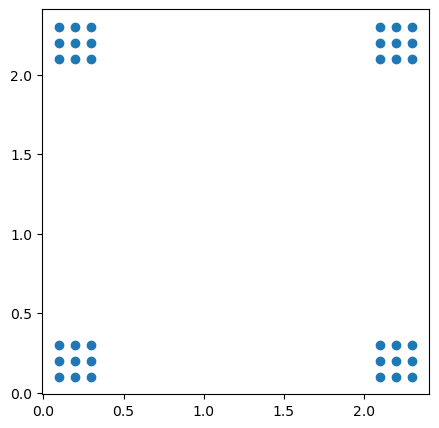

In [10]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(X_lab[:, 0], X_lab[:, 1])
plt.show()

Podemos lanzar el algoritmo varias veces tomando $k=2$ cambiando el _random_state_ y ver qué ocurre 

C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centroides:
 [[0.86666667 0.86666667]
 [2.2        2.2       ]]


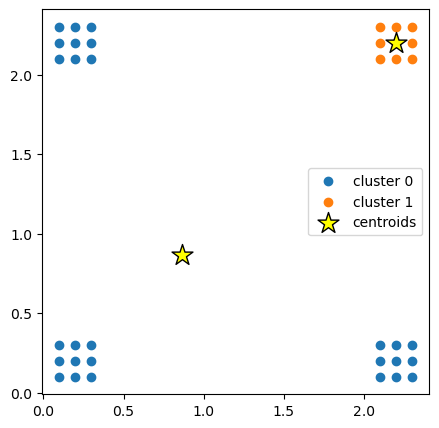

In [11]:
def kmeans_lab(mi_random_state_lab):
    km2 = KMeans(n_clusters=2, init='random',n_init=1, random_state=mi_random_state_lab)
    y_lab = km2.fit_predict(X_lab)
    print('Centroides:\n',km2.cluster_centers_)
    dibuja_clusters(km2,X_lab,y_lab)

# Prueba varias veces cambiando el valor de mi_random_state_lab
mi_random_state_lab = 1
kmeans_lab(mi_random_state_lab)

### K-medias el el conjunto de datos iris

A continuación vamos a hacer K-medias sobre el conjunto de datos Iris.

In [12]:
data_iris = load_iris()
X_iris = data_iris.data
y_iris = data_iris.target

Recordemos que tiene cuatro características (anchura y longitud de pétalo y de sépalo) y tres clases (setosa, versicolor y virgínica). Recordemos su representación tomando ls características dos a dos

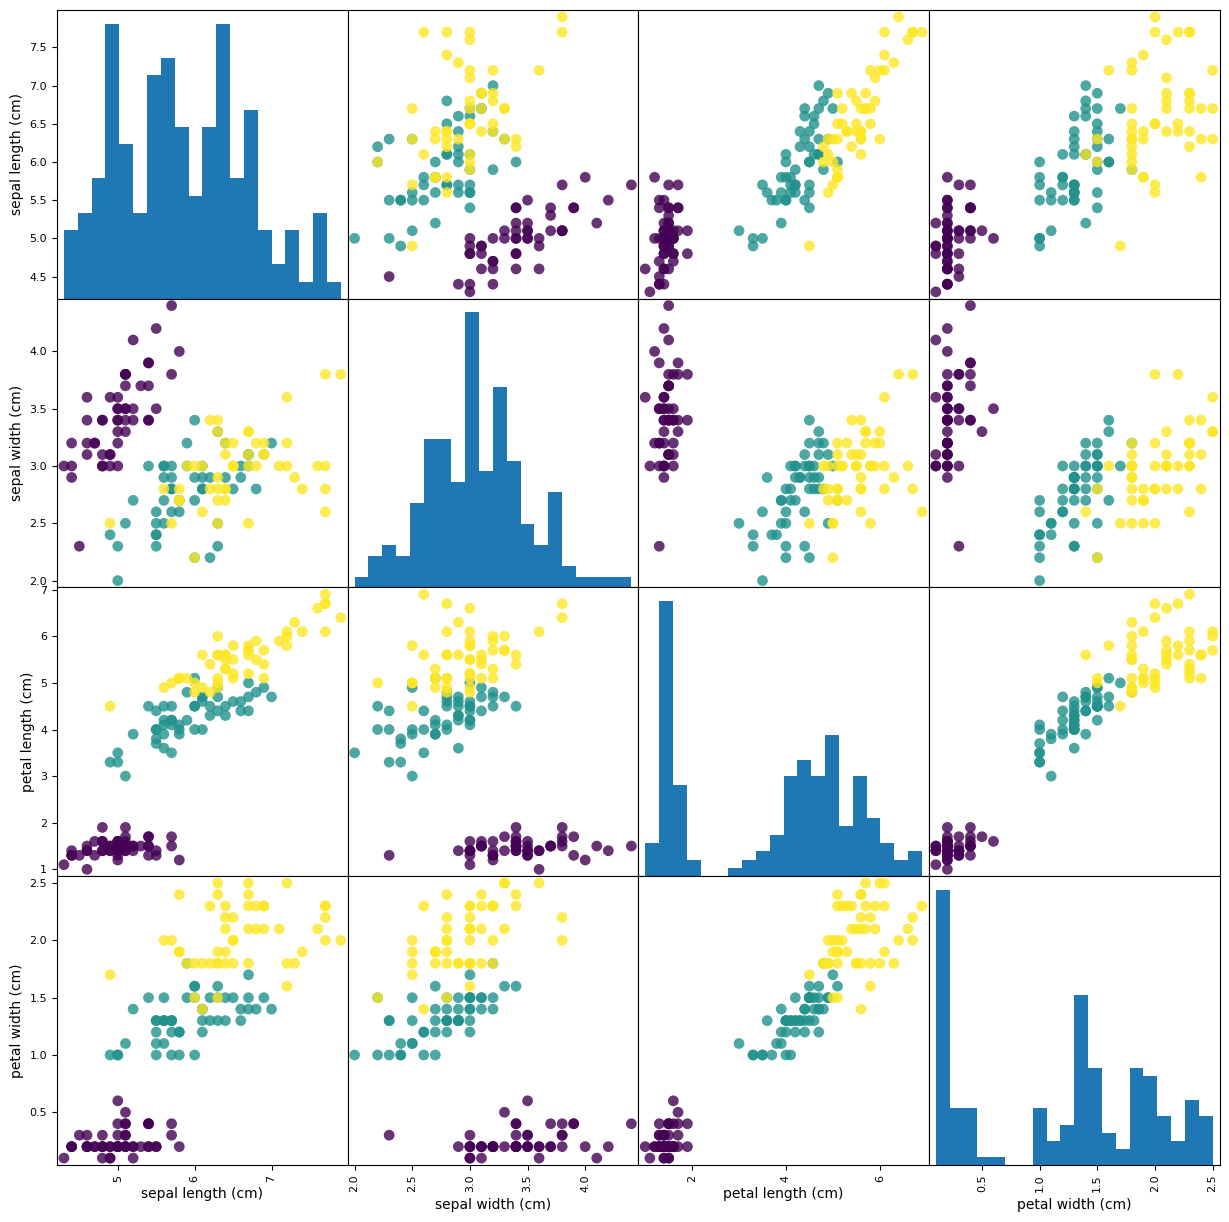

In [13]:
iris_dataframe = pd.DataFrame(X_iris, columns=data_iris.feature_names)
sp = pd.plotting.scatter_matrix(iris_dataframe, c=y_iris, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

Para mantener la intuición visual nos vamos a quedar sólo con una representación en dos dimensiones. En particular nos quedamos con la longitud y anchura del pétalo.

En el gráfico de la izquierda, representamos dos de las características en el plano, coloreando cada instancia según su clase. La gráfica de la derecha representa el mismo conjunto de datos bidimensional, pero sin indicar la clase. Descubrir los tres grupos que se observan según la clasificación, pero sin tener esa información, es el típico problema al que se enfrenta el aprendizaje no supervisado, y el *clustering* en concreto. 


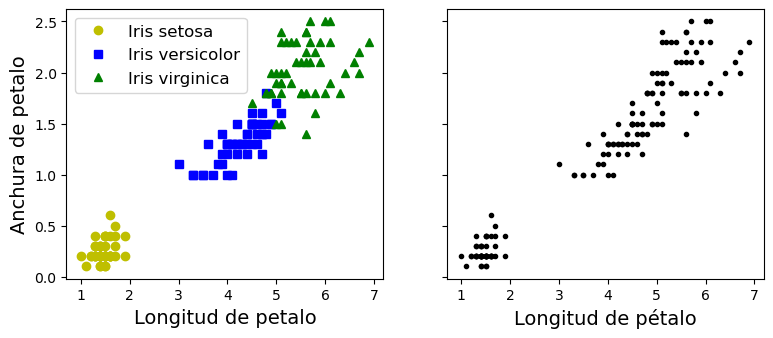

In [15]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X_iris[y_iris==0, 2], X_iris[y_iris==0, 3], "yo", label="Iris setosa")
plt.plot(X_iris[y_iris==1, 2], X_iris[y_iris==1, 3], "bs", label="Iris versicolor")
plt.plot(X_iris[y_iris==2, 2], X_iris[y_iris==2, 3], "g^", label="Iris virginica")
plt.xlabel("Longitud de petalo", fontsize=14)
plt.ylabel("Anchura de petalo", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X_iris[:, 2], X_iris[:, 3], c="k", marker=".")
plt.xlabel("Longitud de pétalo", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

Aplicamos K-medias.

In [16]:
km3 = KMeans(n_clusters=3, random_state=42)
km3.fit(X_iris)

C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Una vez ejecutado el algoritmo, se ha asignado un número de cluster (de grupo) a cada instancia del conjunto de datos. Podemos obtener el número de cluster con _predict_ o mediante el atributo `labels_`:

In [17]:
km3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Con _predict_ obtenemos la misma información

In [18]:
y_iris_predict=km3.predict(X_iris)
y_iris_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Aunque un modelo de clustering no es un clasificador, podemos interpretar en cierto modo que el cluster asignado a cada instancia es una "predicción" del grupo al que pertenece. Como en esta caso sí conocemos la clasificación correcta, podemos comparar la prediccióm con esa clasificación.

In [20]:
confusion_matrix(y_iris_predict,y_iris)

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]], dtype=int64)

Como se observa en la matriz de confusión, uno de los grupos (el segundo, etiquetado como 1) ha sido identificado perfectamente con la clase iris setosa. La clase versicolor coincide casi completamente con el primer grupo (etiqueta 0), aunque esta etiqueta también incluye a 14 instancias de la clase virgínica. El tercer grupo es el que peor se ha identificado, ya que sólo ha recogido a un parte de la clase virgínica.

Podemos comparar los datos reales con las predicciones

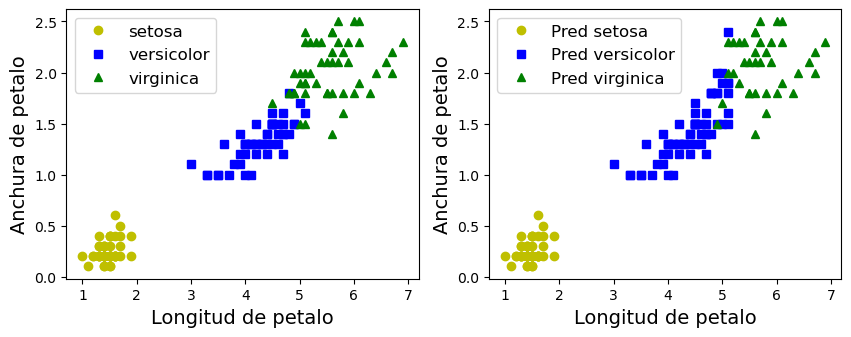

In [21]:
plt.figure(figsize=(10, 3.5))

plt.subplot(121)
plt.plot(X_iris[y_iris==0, 2], X_iris[y_iris==0, 3], "yo", label="setosa")
plt.plot(X_iris[y_iris==1, 2], X_iris[y_iris==1, 3], "bs", label="versicolor")
plt.plot(X_iris[y_iris==2, 2], X_iris[y_iris==2, 3], "g^", label="virginica")
plt.xlabel("Longitud de petalo", fontsize=14)
plt.ylabel("Anchura de petalo", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.plot(X_iris[y_iris_predict==1, 2], X_iris[y_iris_predict==1, 3], "yo", label="Pred setosa")
plt.plot(X_iris[y_iris_predict==0, 2], X_iris[y_iris_predict==0, 3], "bs", label="Pred versicolor")
plt.plot(X_iris[y_iris_predict==2, 2], X_iris[y_iris_predict==2, 3], "g^", label="Pred virginica")
plt.xlabel("Longitud de petalo", fontsize=14)
plt.ylabel("Anchura de petalo", fontsize=14)
plt.legend(fontsize=12)

plt.show()

Puesto que es un ejemplo en el que conocemos el valor  real del cluster original, podemos medir el nivel de acierto. Una forma de hacerlo es midiendo la _homogeneidad_. Un resultado de clustering satisface la _homogeneidad_ si todos los clusters obtenidos contienen solo datos de una única clase original. Más información en https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html

In [22]:
homogeneity_score(y_iris,y_iris_predict)

0.7514854021988339

### Inercia y múltiples inicios aleatorios

Un problema del algoritmo de k-medias es la elección de $k$, esto es, la elección del número de _clusters_. Podemos verlo con el siguiente ejemplo. Vamos a generar un conjunto que se puede dividir de manera natural en 4 clusters

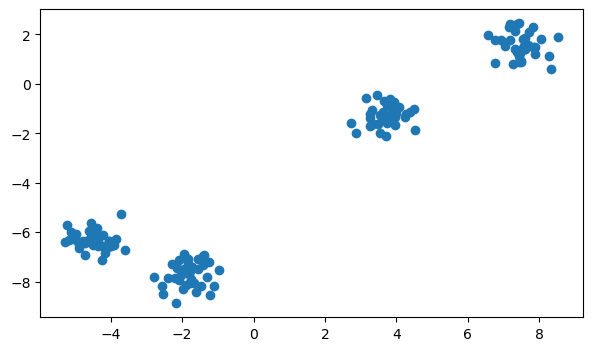

In [23]:
X_inercia, _ = make_blobs(n_samples=150, n_features=2,centers=4, random_state=25,cluster_std=0.4)
plt.rcParams["figure.figsize"] = (7,4)
plt.scatter(X_inercia[:, 0], X_inercia[:, 1])
plt.show()

Veamos que ocurre si aplicamos k-medias con k=2 y k=8

In [24]:
km_inercia_1 = KMeans(n_clusters=2, init='random',n_init=10, random_state=0)
km_inercia_2 = KMeans(n_clusters=7, init='random',n_init=10, random_state=0)

y_km_1 = km_inercia_1.fit_predict(X_inercia)
y_km_2 = km_inercia_2.fit_predict(X_inercia)

C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
def dibuja_clusters(model,Xs,ys):
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=250, marker='*',
    c='yellow', edgecolor='black',label='centroids')
    for i in range(max(ys)+1):
        plt.scatter(Xs[ys==i,0], Xs[ys==i,1],label='cluster ' + str(i))
    plt.legend()
    plt.show()

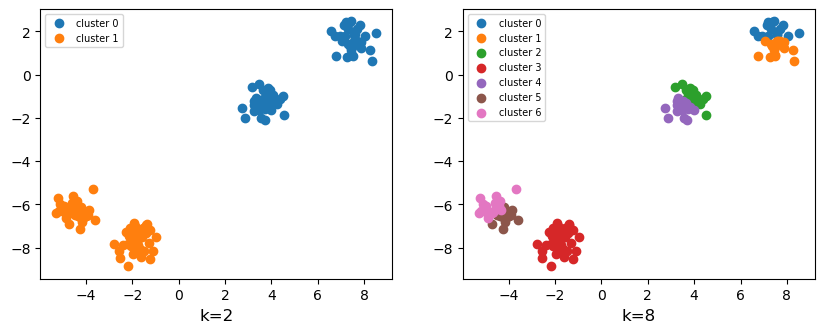

In [26]:
plt.figure(figsize=(10, 3.5))

plt.subplot(121)
for i in range(max(y_km_1)+1):
        plt.scatter(X_inercia[y_km_1==i,0], X_inercia[y_km_1==i,1],label='cluster ' + str(i))
plt.xlabel("k=2", fontsize=12)
plt.legend(fontsize=7)

plt.subplot(122)
for i in range(max(y_km_2)+1):
        plt.scatter(X_inercia[y_km_2==i,0], X_inercia[y_km_2==i,1],label='cluster ' + str(i))
plt.xlabel("k=8", fontsize=12)
plt.legend(fontsize=7)

plt.show()

Como primera aproximación, podríamos pensar que la _inercia_ de la partición puede ser un indicador para elegir el mejo valor de $k$, pero hay que usarla con cuidado, ya que la inercia tiende a descencer cuando $k$ aumenta. (**Nota:** La inercia es la suma de las distancias al cuadrado de cada
dato a su centro más cercano).

In [27]:
print("La inercia con k=2 es",km_inercia_1.inertia_)
print("La inercia con k=8 es",km_inercia_2.inertia_)

La inercia con k=2 es 637.7362238720716
La inercia con k=8 es 38.64663394044557


Una buena estrategia es dibujar una gráfica que nos muestre cómo evoluciona la inercia con respecto al número de clusters:

C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

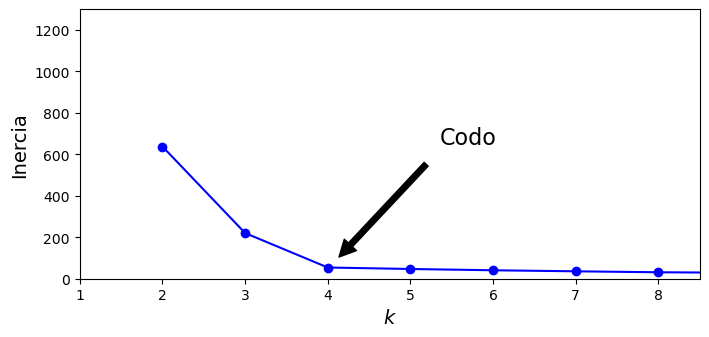

In [28]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_inercia)
                for k in range(2, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

Como se observa en la gráfica, hasta $k=4$, la inercia va experimentando un descenso pronunciado, y a partir de ahí, continúa descendiendo, pero no de manera significativa. Esto nos sugiere que $k=4$ podría ser un número de adecudo de grupos para nuestro conjuto de datos. Con valores menores, podríamos estar mezclando grupos, y con un número mayor podríamos estar partiendo grupos innecesariamente.

Este tipo de gráficas usadas para determinar el número de clusters adecuado, que típicamente tiene la forma de "codo", es lo que llamamos método del codo (*elbow method*).

Este método del codo lo podemos afinar más, si usamos una métrica más precisa como es la métrica *silhouette*. Esta métrica se define como la media de los coeficientes *silhouette* de cada una de las instancias del conjunto de datos respecto del clustering realizado. El coeficiente *silhouette* de una instancia $i$ es $$s(i)=\frac{(b(i)-a(i))}{max(a(i),b(i))}$$  donde:

* $a(i)$  es la distancia media desde la instancia $i$ a las instancias de su cluster (es decir, la distancia media intra-cluster).
* $b(i)$ es la distancia media desde la instancia $i$ al cluster más cercano (distinto del cluster propio). El cluster más cercano es justamente el que minimiza $b(i)$. 

En el caso particular de que el clúster de la instancia $i$ sea unitario, lo definimos como $s(i)=0$. 

Nótese que $a(i)$ mide cómo de dispareja es la instancia $i$ dentro de su clúster, y por tanto un valor bajo indica que está bien emparejado. Razonando de manera análoga, un $b(i)$ bajo indica que la instancia $i$ estaría mejor si se asignara a su cluster vecino.  

Nótese que si $b(i)>a(i)$, entonces $s(i)=1-(a(i)/b(i))$, y por tanto el coeficiente *silhouette* está entre 0 y 1, y más cerca de 1 cuanto mejor sea el emparejamiento con su propio cluster y su no inclusión en otros clusters. Análogamente, si $a(i)>b(i)$, entonces $s(i)=(b(i)/a(i))-1$, estando más cerca de -1 cuanto peor sea el cluster que tiene asignado. 

En scikit-learn, calculamos la métrica *silhouette* con la función `silhouette_score`:

In [29]:
print("El silhoutte score con k=2 es", silhouette_score(X_inercia, km_inercia_1.labels_))
print("El silhoutte score con k=8 es", silhouette_score(X_inercia, km_inercia_2.labels_))

El silhoutte score con k=2 es 0.7882737496516724
El silhoutte score con k=8 es 0.44268523747679145


La gráfica con la métrica *silhouette* en función del número de clusters nos puede aportar igualmente información para decidir sobre el número de clústers: 

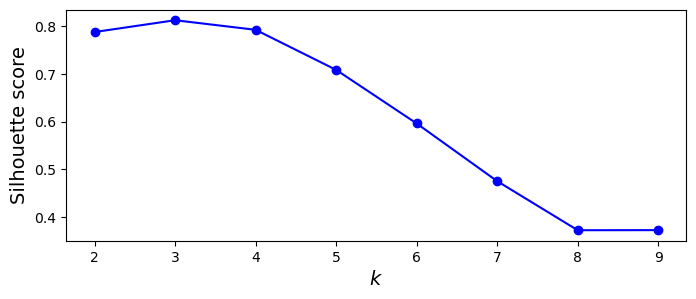

In [30]:
silhouette_scores = [silhouette_score(X_inercia, model.labels_)
                     for model in kmeans_per_k[0:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

Esta gráfica nos dice que tanto $k=2$ como $k=4$ serían posibles candidatos para el número de clusters, pero que el mejor silhoutte score se obtiene con $k=3$.

C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


El silhoutte score con k=3 es 0.8130725955803751


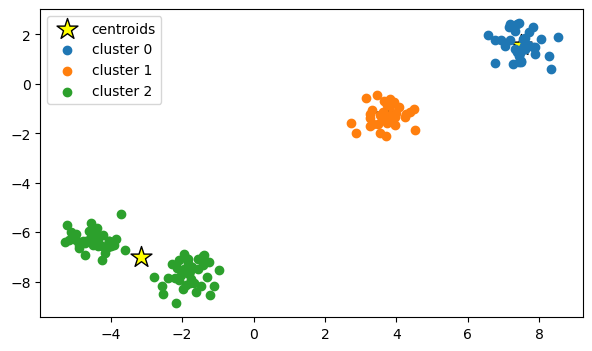

In [31]:
km_inercia_3 = KMeans(n_clusters=3, init='random',n_init=10, random_state=0)
y_km_3 = km_inercia_3.fit_predict(X_inercia)

print("El silhoutte score con k=3 es", silhouette_score(X_inercia, km_inercia_3.labels_))
dibuja_clusters(km_inercia_3,X_inercia,y_km_3)

Una visualización mucho más informativa se obtiene si representamos el coeficiente *silhoutte* de cada instancia mediante barras horizontales, agrupadas por cluster, y dentro de cada cluster ordenada de menor a mayor. Es lo que se conoce como diagramas de *silhoutte*.

Sin entrar en detalles técnicos, el siguiente código nos muestra los diagramas de *silhouette* de los resultados de k-medias en el conjunto de datos *X_inercia*, para $k=3$, $k=4$, $k=5$ y $k=6$.

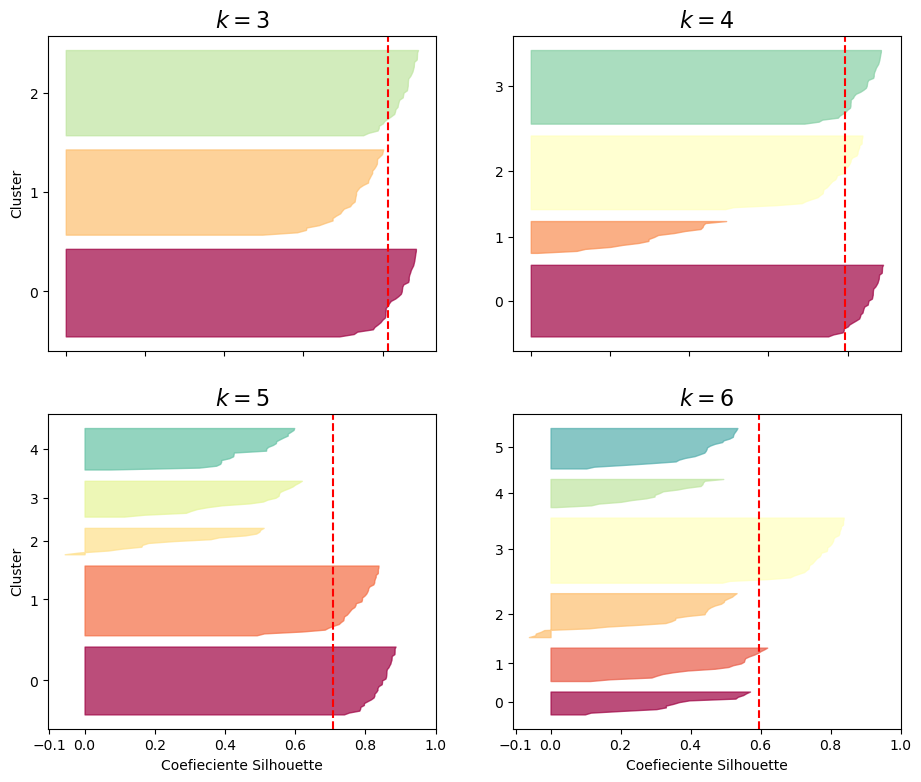

In [32]:
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_inercia, y_pred)

    padding = len(X_inercia)// 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coefieciente Silhouette")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

La línea vertical discontinua representa la métrica *silhoutte* de todo el conjunto. Cuando la mayoría de las instancias de un clúster están por debajo de la métrica para todo el conjunto, es que ese agrupamiento es bastante malo, ya que indica que sus instancias están demasiado cerca de otros clusters (es lo que ocurre por ejemplo con $k=5$ o $k=6$). En cuanto a $k=3$ y $k=4$, se observan que en ambos casos muchas de las instancias sobrepasan la línea discontinua, lo cual indica un buen agrupamiento. 

### Dependencia de los centros iniciales

El algoritmo de k-medias presenta muchas ventajas, principalmente la de ser escalable y rápido, pero también tiene limitaciones como su dependencia de los centros iniciales. También ocurre que no se comporta bien cuando los grupos tienen tamaños o densidades muy diferentes, o no tienen forma "esférica". 

Veamos por ejemplo, un conjunto de datos con grupos elipsoidales, de diferentes dimensiones, densidad y orientación

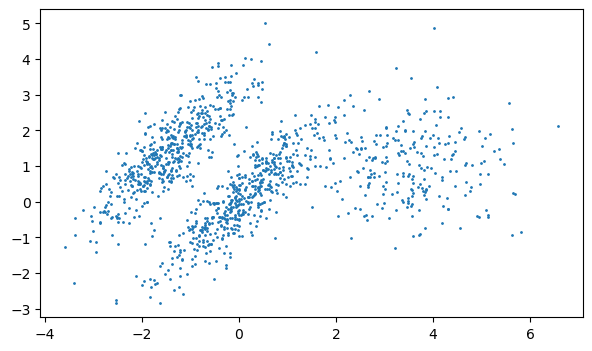

In [33]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))         # dos clusters forma elipsoidal
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42) # un cluster esférico diferente densidad
X2 = X2 + [6, -8] # traslación
X_elip = np.r_[X1, X2]
y_elip = np.r_[y1, y2]

plt.scatter(X_elip[:, 0], X_elip[:, 1],s=1)
plt.show()

Ejecutemos k-medias sobre este conjunto de datos de dos maneras diferentes (la primera indicando los centros iniciales) y representemos gráficamente el resultado.

In [34]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X_elip)
kmeans_bad.fit(X_elip)

C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Para la representación gráfica usaremos la función *plot_decision_boundaries*

In [35]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=False,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
#    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

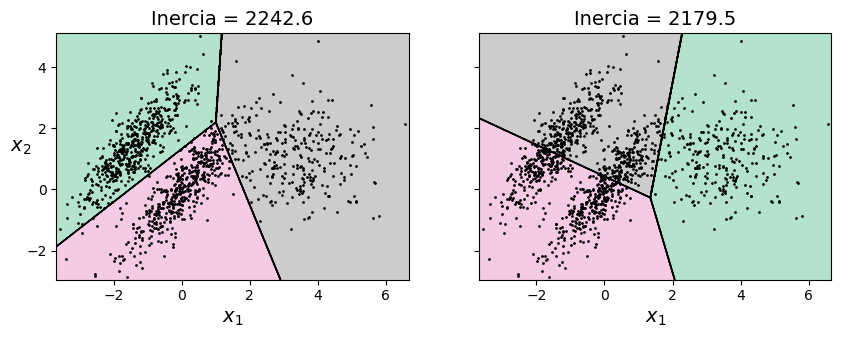

In [36]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X_elip)
plt.scatter(X_elip[:, 0], X_elip[:, 1],s=1,c="black")
plt.title("Inercia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X_elip, show_ylabels=False)
plt.scatter(X_elip[:, 0], X_elip[:, 1],s=1,c="black")
plt.title("Inercia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

El segundo de los resultados es claramente insatisfactorio, como se observa en la figura, a pesar de tener una mejor inercia. El primero es aceptable, pero igualmente no se ha captado bien el segundo de los clústers. 

# DBSCAN

Vamos ahora a ver un algoritmo de clustering que sigue una aproximación muy distinta al de k-medias, basada en la densidad local del conjunto de datos. Esta aproximación permite abordar conjuntos de datos en los que los grupos tienen muy diversas formas. 

Como se ha explicado en las diapositivas, este algoritmo construye los grupos localizando regiones continuas de instancias, con alta densidad. Recibe dos parámetros: $\epsilon$ y `min_samples`, que respectivamente van a definir la distancia en la *vecindad* y el número mínimo de instancias que tiene que haber en una vecindad para que sea considerada de la suficiente densidad. 

Así es como actúa DBSCAN:

* Para cada instancia, cuenta cuántas instancias tiene a una distancia menor que $\epsilon$ (lo que llamamos $\epsilon$-vecindad). 
* Si una instancia tiene *al menos* `min_samples` instancias en su $\epsilon$-vecindad, entonces se considera una instancia *núcleo*. 
* Todas las instancias en la $\epsilon$-vecindad de un núcleo, se consideran dentro del mismo clúster. Esta vecindad puede incluir a su vez otros núcleos, creándose así secuencias de núcleos que forman un clúster.
* Aquellas instancias que no son núcleos ni están en la $\epsilon$-vecindad de un núcleo, se considera una anomalía (ruido).  

Vamos a probar este algoritmo sobre los datos que genera la utilidad `make_moons` (dos semicírculos entrelazados). Por las razones ya comentadas, k-medias no funciona bien sobre este conjunto, ya que los grupos no son "esféricos":

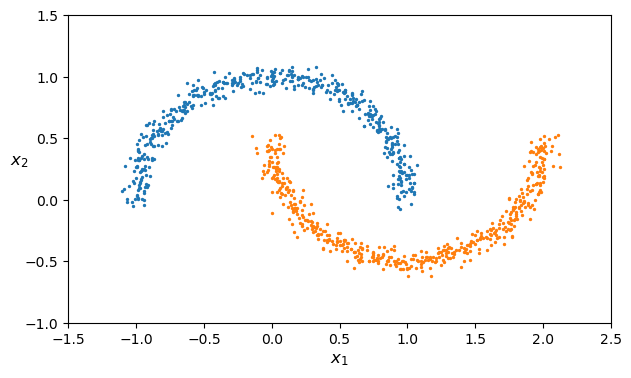

In [37]:
mi_num_samples = 1000

X_moons, y_moons = make_moons(n_samples=mi_num_samples, noise=0.05, random_state=42)


plt.scatter(X_moons[:, 0][y_moons==0], X_moons[:, 1][y_moons==0], s=2)
plt.scatter(X_moons[:, 0][y_moons==1], X_moons[:, 1][y_moons==1],s=2)


plt.axis([-1.5, 2.5, -1, 1.5])

plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12, rotation=0)
plt.show()

Ejecutemos DBSCAN sobre este dataset, con $\epsilon=0.05$ y `min_samples=5`

In [38]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X_moons)

DBSCAN(eps=0.05)

En primer lugar, como en k-medias, tenemos el atributo labels_ que indica el número de clúster al que ha sido asignado cada instancia (si una instancia tiene asignada la etiqueta -1, significa que DBSCAN lo considera _ruido_):

In [39]:
dbscan.labels_[:15]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2],
      dtype=int64)

Podemos ver cuántos puntos son núcleo, cuántos frontera y cuantos ruido:

In [40]:
num_nucleo = len(dbscan.core_sample_indices_)
num_ruido = (sum(1 for x in dbscan.labels_ if x==-1))
num_frontera = mi_num_samples - (num_nucleo + num_ruido)


print('De los',mi_num_samples,'puntos')
print('   *',num_nucleo,'son puntos núcleo')
print('   *',num_frontera,'son puntos frontera')
print('   *',num_ruido,'son puntos ruido')

De los 1000 puntos
   * 808 son puntos núcleo
   * 115 son puntos frontera
   * 77 son puntos ruido


Podemos saber también el número de clusters encontrados

In [41]:
print('DBSCAN ha encontrado',max(dbscan.labels_)+1,'clusters')

DBSCAN ha encontrado 7 clusters


Obviamente, nuestra intención no era dividir el conjunto en 7 clusters. Quizás estemos exigiendo demasiado para declarar que dos puntos son _vecinos_. Veamos 

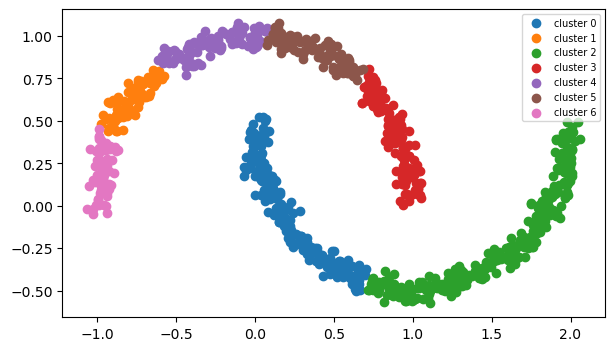

In [42]:
for i in range(max(dbscan.labels_)+1):
        plt.scatter(X_moons[dbscan.labels_==i,0], X_moons[dbscan.labels_==i,1],label='cluster ' + str(i))
plt.legend(fontsize=7)

plt.show()

Volvamos a aplicar DBSCAN con $eps=0.2$ y veamos qué salida obtenemos.

In [44]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X_moons)

DBSCAN(eps=0.2)

In [45]:
print('DBSCAN ha encontrado',max(dbscan2.labels_)+1,'clusters')

num_nucleo2 = len(dbscan2.core_sample_indices_)
num_ruido2 = (sum(1 for x in dbscan2.labels_ if x==-1))
num_frontera2 = mi_num_samples - (num_nucleo2 + num_ruido2)

print('De los',mi_num_samples,'puntos')
print('   *',num_nucleo2,'son puntos núcleo')
print('   *',num_frontera2,'son puntos frontera')
print('   *',num_ruido2,'son puntos ruido')

DBSCAN ha encontrado 2 clusters
De los 1000 puntos
   * 1000 son puntos núcleo
   * 0 son puntos frontera
   * 0 son puntos ruido


Si los representamos gráficamente tenemos

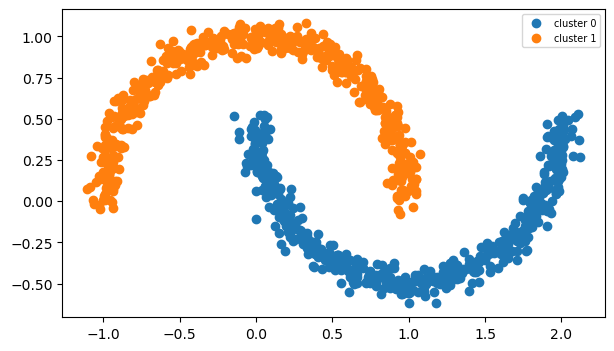

In [46]:
for i in range(max(dbscan2.labels_)+1):
        plt.scatter(X_moons[dbscan2.labels_==i,0], X_moons[dbscan2.labels_==i,1],label='cluster ' + str(i))
plt.legend(fontsize=7)

plt.show()

Podemos hacer una comparativa gráfica con la función *plot_dbscan*

In [47]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=12, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("epsilon={:.2f}, minPts={}".format(dbscan.eps, dbscan.min_samples), fontsize=12)    

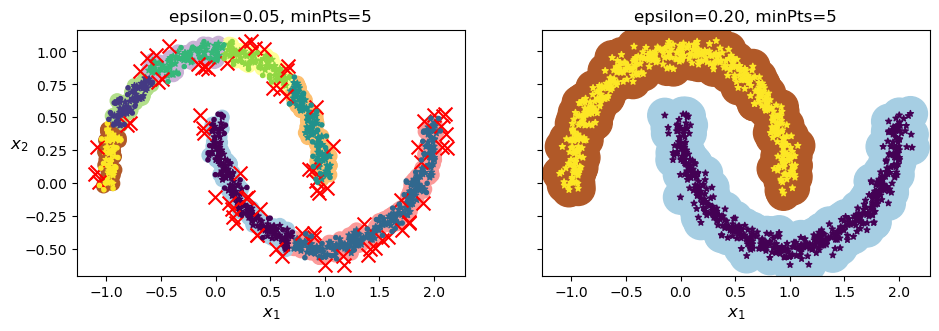

In [48]:
plt.figure(figsize=(11, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X_moons, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X_moons, size=600, show_ylabels=False)

plt.show()

# Mezcla de distribuciones gaussianas

Vamos ahora a ver un algoritmo de clustering que está basado en la suposición de que los grupos se han generado a partir de una mezcla de distribuciones de Gauss, cuyos parámetros (medias y matrices de covarianza, y probabilidad de cada grupo) son desconocidos a priori. Para cada instancia sabemos que ha sido generada por una de las distribuciones, pero no sabemos por cuál. Puede verse con una generalización del algoritmo de k-medias. 

### Un ejemplo de juguete

Veamos un ejemplo en ${\mathbb R}$. En primer lugar vamos a tomar muestras de una distribución normal (gaussiana) de media y desviación típica conocida.

In [50]:
num_samples_gauss_1 = 1000 # Número de muestras
mu_1, sigma_1 = -7, 0.1    # Media y desviación típica
s1 = np.random.normal(mu_1, sigma_1, num_samples_gauss_1)

Podemos ver los puntos obtenidos, pero no nos proporciona mucha información

In [51]:
s1

array([-6.86829194, -6.86786048, -7.20227741, -7.01797271, -6.8267632 ,
       -7.14575729, -7.0478469 , -6.92667029, -6.84099134, -6.79595946,
       -7.06707741, -6.91445973, -7.18305313, -7.07909202, -7.20262489,
       -6.91416749, -6.81227632, -7.01509363, -6.91559483, -7.10879406,
       -6.86290447, -7.05313499, -7.15555534, -6.8828461 , -7.04354252,
       -7.10333206, -6.95587059, -6.93567379, -6.83810261, -6.86699552,
       -7.1504787 , -6.92522012, -7.16710112, -7.08986039, -6.89149573,
       -6.87293699, -6.87940157, -7.02817765, -7.02164762, -7.09805107,
       -6.94165542, -7.03945531, -6.95990432, -7.13881143, -6.88670077,
       -7.09965752, -7.05146252, -6.94819193, -7.02472299, -6.93888509,
       -7.0367991 , -6.88194153, -6.96525743, -6.80652805, -7.12717504,
       -7.00514476, -7.03551922, -7.13680843, -7.01489877, -6.94947473,
       -6.95915478, -6.96069096, -6.88717844, -7.03509902, -6.94181223,
       -7.15099496, -7.015943  , -7.04089329, -6.91042883, -6.96

Podemos representarlos en ${\mathbb R}$

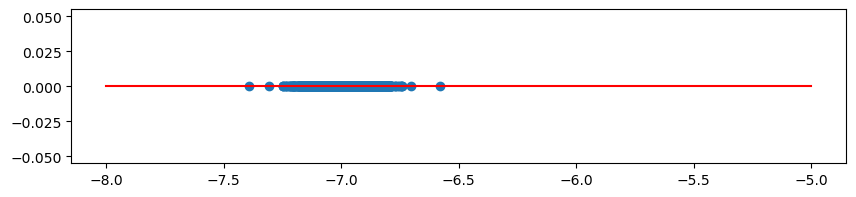

In [52]:
plt.rcParams["figure.figsize"] = (10,2)
plt.plot([-8,-5],[0,0],c='red')
plt.scatter(s1,np.array([0]*num_samples_gauss_1))
plt.show()

Esa representación tampoco nos da mucha información. Dibujemos el histograma de los ejemplos junto a la función de densidad

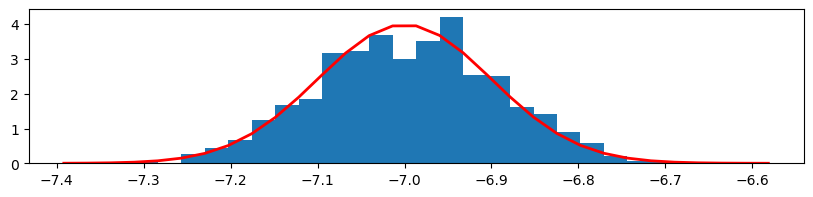

In [53]:
count, bins, ignored = plt.hist(s1, 30, density=True)
plt.plot(bins, 1/(sigma_1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_1)**2 / (2 * sigma_1**2) ),
         linewidth=2, color='r')
plt.show()

Ese histograma sí nos da una idea de cómo se han distribuido los puntos alrededor de la media.

Consideremos otros dos conjuntos obtenidos muestreando otras dos distribuciones de probabilidad con media y desviación típicas distintas

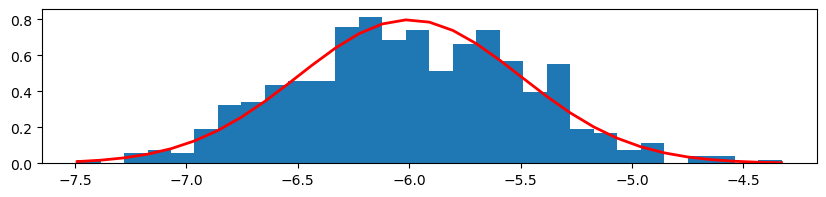

In [55]:
num_samples_gauss_2 = 500 # Número de muestras
mu_2, sigma_2 = -6, 0.5    # Media y desviación típica
s2 = np.random.normal(mu_2, sigma_2, num_samples_gauss_2)

count, bins, ignored = plt.hist(s2, 30, density=True)
plt.plot(bins, 1/(sigma_2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_2)**2 / (2 * sigma_2**2) ),
         linewidth=2, color='r')
plt.show()

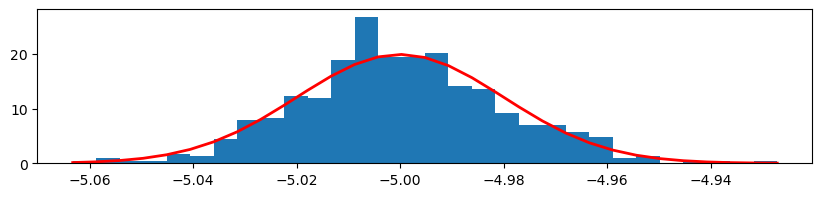

In [57]:
num_samples_gauss_3 = 500 # Número de muestras
mu_3, sigma_3= -5, 0.02    # Media y desviación típica
s3 = np.random.normal(mu_3, sigma_3, num_samples_gauss_3)

count, bins, ignored = plt.hist(s3, 30, density=True)
plt.plot(bins, 1/(sigma_3 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_3)**2 / (2 * sigma_3**2) ),
         linewidth=2, color='r')
plt.show()

Vamos a unir los tres conjuntos y a reordenar los elementos aletoriamente. Supongamos que el conjunto de puntos resultante es nuestro conjunto de entrada.

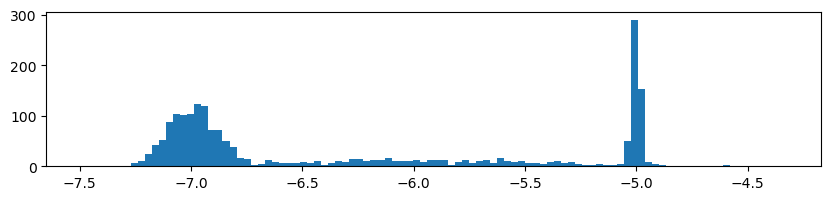

In [58]:
samples_gauss_1 = np.concatenate((s1,s2,s3))
np.random.shuffle(samples_gauss_1)

count, bins, ignored = plt.hist(samples_gauss_1, 100, density=False)
plt.show()

El objetivo de esta técnica de clustering es encontrar las medias y las desviaciones típicas de las distribuciones de probabilidad que han generado el conjunto de datos.

In [69]:
gm_1 = GaussianMixture(n_components=3, random_state=42)

In [70]:
gm_1.fit(samples_gauss_1.reshape(-1,1))

C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


GaussianMixture(n_components=3, random_state=42)

Podemos ver qué porporción de puntos asocia a cada cluster. Los datos originales son (1000,500,500) así que la salida debería ser próxima a (0.5, 0.25, 0.25)

In [71]:
gm_1.weights_

array([0.50773181, 0.24716904, 0.24509914])

Veamos las medias obtenidas y sus varianzas

In [72]:
gm_1.means_

array([[-6.99241698],
       [-4.99995301],
       [-5.9573943 ]])

In [73]:
gm_1.covariances_

array([[[0.01124497]],

       [[0.00036029]],

       [[0.25942092]]])

In [74]:
print('En la primera distribución de probabilidad:')
print('  * La media original era',mu_1,'y la media obtenida ha sido',gm_1.means_[0][0])
print('  * La varianza original era',sigma_1**2,'y la varianza obtenida ha sido',gm_1.covariances_[0][0][0])
print(' ')
print('En la segunda distribución de probabilidad:')
print('  * La media original era',mu_2,'y la media obtenida ha sido',gm_1.means_[2][0])
print('  * La varianza original era',sigma_2**2,'y la varianza obtenida ha sido',gm_1.covariances_[2][0][0])
print(' ')
print('En la tercera distribución de probabilidad:')
print('  * La media original era',mu_3,'y la media obtenida ha sido',gm_1.means_[1][0])
print('  * La varianza original era',sigma_3**2,'y la varianza obtenida ha sido',gm_1.covariances_[1][0][0])

En la primera distribución de probabilidad:
  * La media original era -7 y la media obtenida ha sido -6.992416980512778
  * La varianza original era 0.010000000000000002 y la varianza obtenida ha sido 0.011244968500405123
 
En la segunda distribución de probabilidad:
  * La media original era -6 y la media obtenida ha sido -5.9573943035654455
  * La varianza original era 0.25 y la varianza obtenida ha sido 0.25942092416554885
 
En la tercera distribución de probabilidad:
  * La media original era -5 y la media obtenida ha sido -4.999953006323781
  * La varianza original era 0.0004 y la varianza obtenida ha sido 0.0003602872790964607


Como en k-medias, tenemos un método `predict`, que nos devuelve la predición sobre el grupo al que pertenece cada instancia: 

In [75]:
test = np.array([-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4],dtype='float32').reshape(-1,1)
gm_1.predict(test)

array([2, 0, 2, 2, 2, 1, 2, 2], dtype=int64)

A diferencia de k-medias, esta asignación está basada en las probabilidades que tiene cada instancia de pertenecer a cada grupo, calculadas según los parámetros aprendidos y las correspondientes distribuciones de probabilidad. El método `predict_proba` nos da para cada instancia, la probabilidad de pertenecer a cada grupo:

In [76]:
np.round(gm_1.predict_proba(test),decimals =3)

array([[0.01 , 0.   , 0.99 ],
       [0.988, 0.   , 0.012],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.994, 0.006],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

Una vez visto cómo funciona la mezcla de distribuciones gaussianas pasemos a un ejemplo general

### Un ejemplo general

Las instrucciones siguiente usan `make_blobs` junto con una serie de transformaciones, para crear un conjunto de datos aleatorios (en dos dimensiones), con tres grupos generados a partir de distribuciones de Gauss, con distintas densidades, centros y orientaciones.  

En `X_blobs` tenemos el conjunto de datos generados, y en `y_blobs` el grupo del que proviene cada instancia (aunque esto último obviamente no lo usaremos en nuestras pruebas con el algoritmo). 

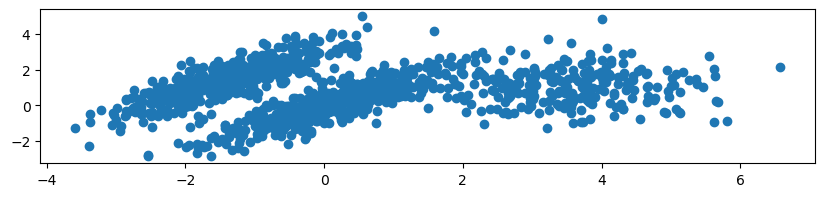

In [77]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
# Concatenamos las matrices
X_blobs = np.r_[X1, X2]  
y_blobs = np.r_[y1, y2]

plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.show()

Aplicamos el algoritmo de mezcla de distribuciones gaussianas

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_blobs)

C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\diego\anaconda3\envs\robotica\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

Podemos preguntarle por la proporción de puntos en cada cluster. 

In [62]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

Por los centroides de cada grupo y sus matriz de covarianzas

In [63]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [64]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

Podemos también preguntar si el algoritmo ha convergido, y en cuantas iteraciones:

In [65]:
gm.converged_

True

In [66]:
gm.n_iter_

4

Además, un modelo `GaussianMixture` es *generativo*, lo que significa que podemos realizar un muestreo para obtener nuevas instancias, acordes con la distribución de probabilidad aprendidas. El método `sample` realiza este muestreo:

In [67]:
X_new, y_new = gm.sample(10)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-1.39470877, -1.48519442],
       [-1.21373648,  2.0330991 ],
       [-0.92979701,  1.82407307],
       [ 2.84104923, -0.73858639],
       [ 5.13870053,  0.21904278],
       [ 4.5220058 ,  1.18560751],
       [ 4.13891358, -0.4565177 ],
       [ 1.80983883,  1.0966783 ]])

In [68]:
# Nótese que devuelve los puntos por orden del clúster asignado
y_new

array([0, 0, 0, 1, 1, 2, 2, 2, 2, 2])

El siguiente bloque de código nos permite ver gráficamente los grupos localizados en `X_blobs`, con las distintas densidades marcadas con colores y contornos. Las líneas discontinuas son las fronteras de decisión: 

In [69]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

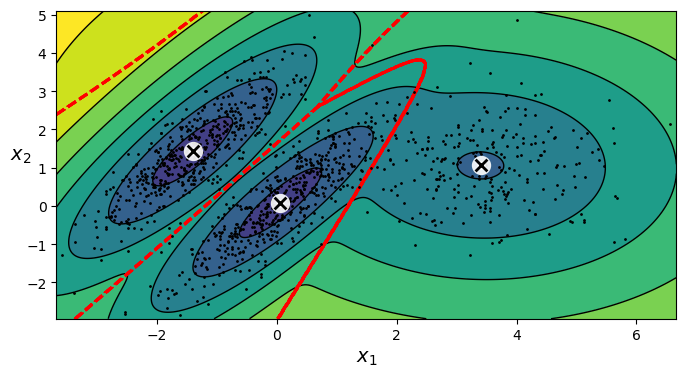

In [70]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_blobs)
plt.show()

La figura anterior nos muestra que el algoritmo ha encontrado una solución muy buena. Para ser justos, hay que decir que se ha visto favorecido por el hecho de que los datos han sido generados realmente por una mezcla de distribuciones de Gauss, y además le hemos proporcionado el número correcto de grupos.

### Detección de anomalías (outliers)

Una aplicación muy intesante del clustering, y en particular de los modelos de mezcla gaussiana, es el de la *detección de anomalías*. La detección de anomalías consiste en la tarea de detectar datos que se desvían considerablemente de la norma (en inglés, las anomalías se denominan *outliers*). 

Las mezcla de distribuciones de Gauss se puede usar para detección de anomalías: simplemente, considerar aquellas instancias que están situadas en regiones de baja densidad (respecto a la función de densidad de probabilidad, PDF). En este caso, debemos establecer el umbral de densidad a partir del cual consideramos que tenemos las anomalías. 

Este umbral se puede establecer a través de un percentil. Por ejemplo, si consideramos que el 4% con menor valor de PDF es considerado como anomalía. La detección de anomalías es útil en muchos campos. Por ejemplo: detección de fraudes, localización de productos defectuosos, o como preprocesado de datos, eliminando las anomalías antes del entrenamiento.  

In [71]:
densidades = gm.score_samples(X_blobs)
umbral_densidades = np.percentile(densidades, 4)
anomalias = X_blobs[densidades < umbral_densidades]

Volvamos a representar el clustering realizado en `X_blobs`, y marquemos las anomalías (aquellas cuya PDF están por debajo del umbral del 4%) con un asterisco rojo:

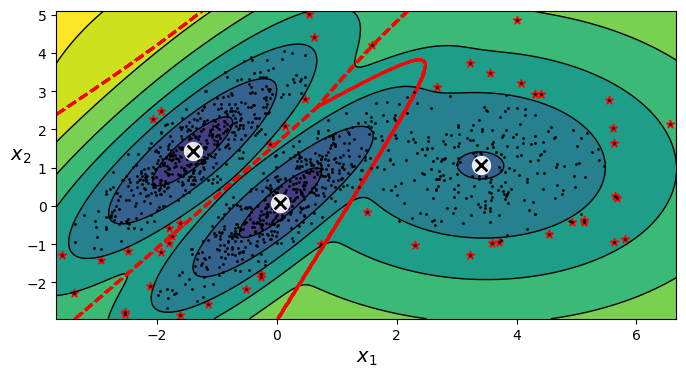

In [72]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X_blobs)
plt.scatter(anomalias[:, 0], anomalias[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

Podemos por ejemplo bajar el umbral y considerar como anomalías aquellas cuyas instancias están por debajo del 1% del total.

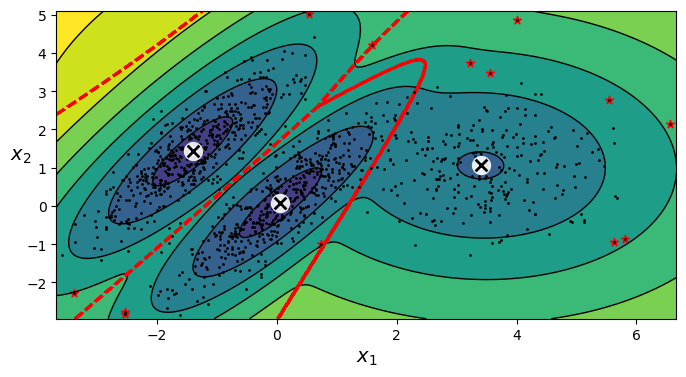

In [73]:
densidades = gm.score_samples(X_blobs)
umbral_densidades = np.percentile(densidades, 1)
anomalias = X_blobs[densidades < umbral_densidades]

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X_blobs)
plt.scatter(anomalias[:, 0], anomalias[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()